In [1]:
import numpy as np

In [2]:
#fully connected layer
class dense_layer():
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(output_size, input_size)
        self.bias = np.random.randn(output_size, 1)

    # [ [y1 = x1w11 + x2w12+...+xiw1i + b1] 
    #   [y2 = x1w21 + x2w22+...+xiw2i + b2]
    #   [yj = x1wj1 + x2wj2+...+xiwji + bj] ]
    def forward(self, input):
        self.input = input
        output = np.dot(self.weights, self.input) + self.bias
        return output
    
    # dW = dE/dY * X^{-1}
    # dB = dE/dY
    # dX = W^{-1} * dE/dY
    def backward(self, output_gradient, learning_rate):
        weights_gradient = np.dot(output_gradient, self.input.T)
        bias_gradient = output_gradient
        input_gradient = np.dot(self.weights.T, output_gradient)
        #update the coefficient
        self.weights -= learning_rate * weights_gradient
        self.bias -= learning_rate * bias_gradient
        return input_gradient

In [3]:
#Activation Function
class tanh_layer():
    def __init__(self):
        self.activation = lambda x : np.tanh(x)
        self.activation_derivative = lambda x : 1 - np.tanh(x) ** 2
    # [ [y1 = f(x1)] 
    #   [y2 = f(x2)]
    #   [yj = f(xi)] ]
    def forward(self, input):
        self.input = input
        output = self.activation(self.input)
        return output
    
    # dxi = dE / dyi (multiply) df/dxi
    def backward(self, output_gradient,learning_rate):
        next_gradient = np.multiply(output_gradient, self.activation_derivative(self.input))
        return next_gradient

In [4]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mse_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true) / np.size(y_true)


In [5]:
X = np.array([ [[0],[0]], 
               [[0],[1]], 
               [[1],[0]], 
               [[1],[1]] ])
Y = np.array([[0], [1], [1], [0]])
network = [
    dense_layer(2,4),
    tanh_layer(),
    dense_layer(4, 1),
    tanh_layer()
]
epochs = 10000
learning_rate = 0.1
def predict(network, input):
    output = input
    for layer in network:
        output = layer.forward(output)
    return output

for e in range(epochs):
    for i in range(4):
        # forward
        output = predict(network, X[i])

        # backward
        grad = mse_derivative(Y[i], output)
        for layer in reversed(network):
            grad = layer.backward(grad,learning_rate)


        if e % 1000 == 0:
            loss = np.mean(np.power(Y[i] - output, 2))
            print(f'Epoch {e}, Loss: {loss}')

Epoch 0, Loss: 0.9825087286311349
Epoch 0, Loss: 0.0023451798258350663
Epoch 0, Loss: 0.0014307200751720339
Epoch 0, Loss: 0.793493073103582
Epoch 1000, Loss: 9.946586599249722e-05
Epoch 1000, Loss: 0.007067706816085818
Epoch 1000, Loss: 0.0030118148589499015
Epoch 1000, Loss: 7.694666510765788e-05
Epoch 2000, Loss: 2.7513557104332625e-07
Epoch 2000, Loss: 0.0004200122998291212
Epoch 2000, Loss: 0.00016450473392578275
Epoch 2000, Loss: 3.3679904478853243e-07
Epoch 3000, Loss: 6.27938405866271e-08
Epoch 3000, Loss: 0.0002060822849098736
Epoch 3000, Loss: 7.902428109063165e-05
Epoch 3000, Loss: 8.291742405410017e-08
Epoch 4000, Loss: 2.609303133996204e-08
Epoch 4000, Loss: 0.00013490318892938062
Epoch 4000, Loss: 5.1090884869510734e-05
Epoch 4000, Loss: 3.589639279059685e-08
Epoch 5000, Loss: 1.3953775316914525e-08
Epoch 5000, Loss: 9.971705020541983e-05
Epoch 5000, Loss: 3.743510753845501e-05
Epoch 5000, Loss: 1.9734100895369103e-08
Epoch 6000, Loss: 8.58037634026786e-09
Epoch 6000, Los

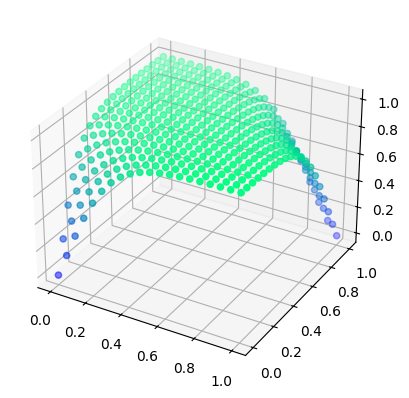

In [6]:
# decision boundary plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
points = []
for x1 in np.linspace(0, 1, 20):
    for x2 in np.linspace(0, 1, 20):
        z = predict(network, [[x1], [x2]])
        points.append([x1, x2, z[0,0]])

points = np.array(points)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=points[:, 2], cmap="winter")
plt.show()
